In [3]:
import pandas as pd

data = pd.read_csv('./lacity.org-website-traffic.csv')

In [4]:
data.head()

,Date,Device Category,Browser,# of Visitors,Sessions,Bounce Rate
0,2014-01-01T00:00:00.000,desktop,Chrome,900,934,55.5675
1,2014-01-01T00:00:00.000,desktop,Firefox,692,761,40.8673
2,2014-01-01T00:00:00.000,desktop,Internet Explorer,1038,1107,31.2556
3,2014-01-01T00:00:00.000,desktop,Opera,35,35,100.0000
4,2014-01-01T00:00:00.000,desktop,Safari,484,554,24.9097


In [5]:
data.shape

(8348985, 6)

In [6]:
data.describe()

,# of Visitors,Sessions,Bounce Rate
count,8.348985e+06,8.348985e+06,8.348985e+06
mean,6.150075e+02,6.899815e+02,5.246254e+01
std,9.586180e+02,1.093220e+03,3.215602e+01
min,3.500000e+01,3.500000e+01,0.000000e+00
25%,4.000000e+01,7.000000e+01,3.333330e+01
50%,2.190000e+02,2.370000e+02,5.000000e+01
75%,8.340000e+02,9.220000e+02,7.640620e+01
max,3.436500e+04,4.617200e+04,1.000000e+02


In [7]:
data.dtypes

Date                object
Device Category     object
Browser             object
# of Visitors        int64
Sessions             int64
Bounce Rate        float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348985 entries, 0 to 8348984
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             object 
 1   Device Category  object 
 2   Browser          object 
 3   # of Visitors    int64  
 4   Sessions         int64  
 5   Bounce Rate      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 382.2+ MB


In [9]:
data.isnull().sum()

Date               0
Device Category    0
Browser            0
# of Visitors      0
Sessions           0
Bounce Rate        0
dtype: int64

In [13]:
#Converting Date column from object to datetime datatype
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%dT%H:%M:%S.%f')

In [16]:
data.head()

,Date,Device Category,Browser,# of Visitors,Sessions,Bounce Rate
0,2014-01-01,desktop,Chrome,900,934,55.5675
1,2014-01-01,desktop,Firefox,692,761,40.8673
2,2014-01-01,desktop,Internet Explorer,1038,1107,31.2556
3,2014-01-01,desktop,Opera,35,35,100.0000
4,2014-01-01,desktop,Safari,484,554,24.9097


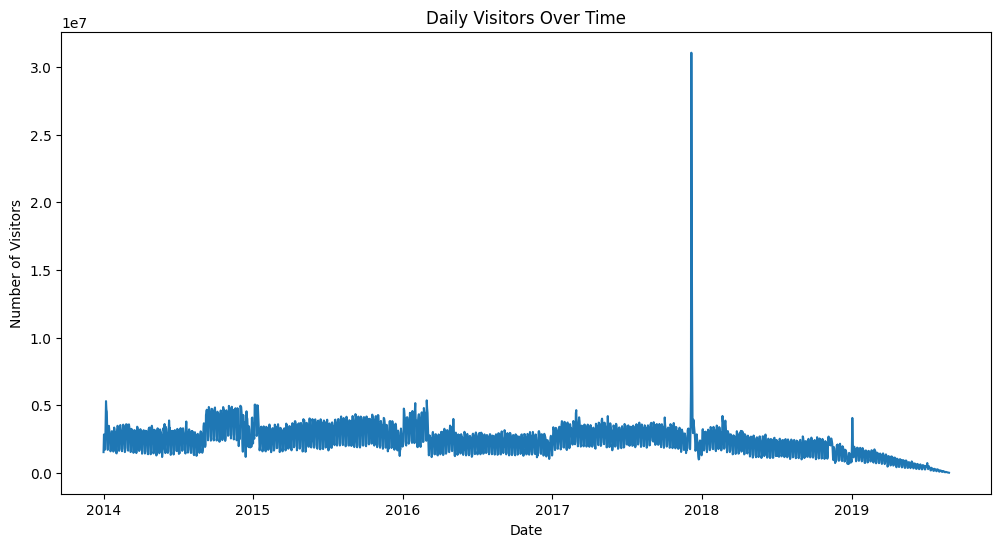

In [22]:
#Trend Analysis
#Analyze trends over time, Here, we focus on the number of visitors over time.

import matplotlib.pyplot as plt

daily_data = data.groupby('Date').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['# of Visitors'])
plt.title('Daily Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.show()

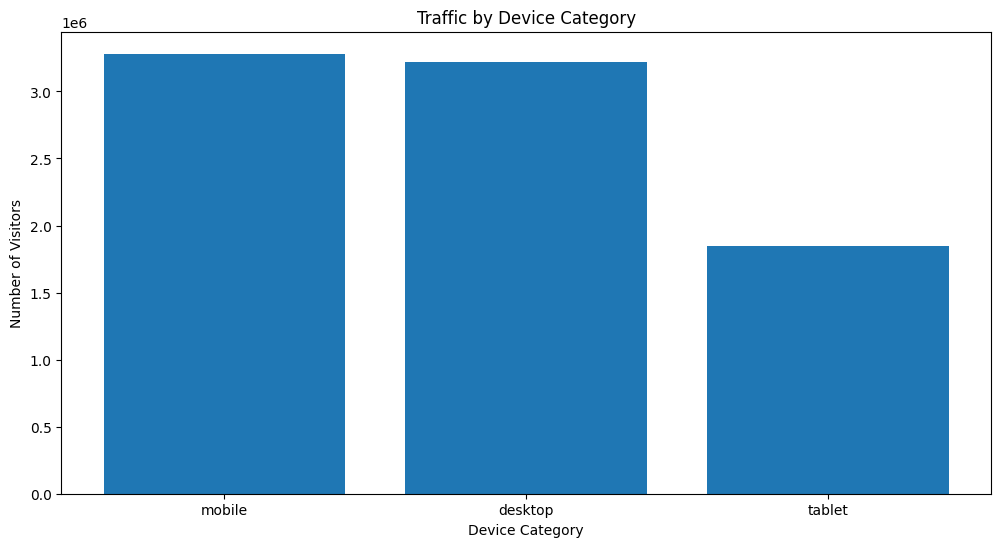

In [24]:
#Device and Browser Analysis
#To understand the distribution of traffic by different device categories and browsers.

# Device analysis
device_data = data['Device Category'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(device_data.index, device_data.values)
plt.title('Traffic by Device Category')
plt.xlabel('Device Category')
plt.ylabel('Number of Visitors')
plt.show()


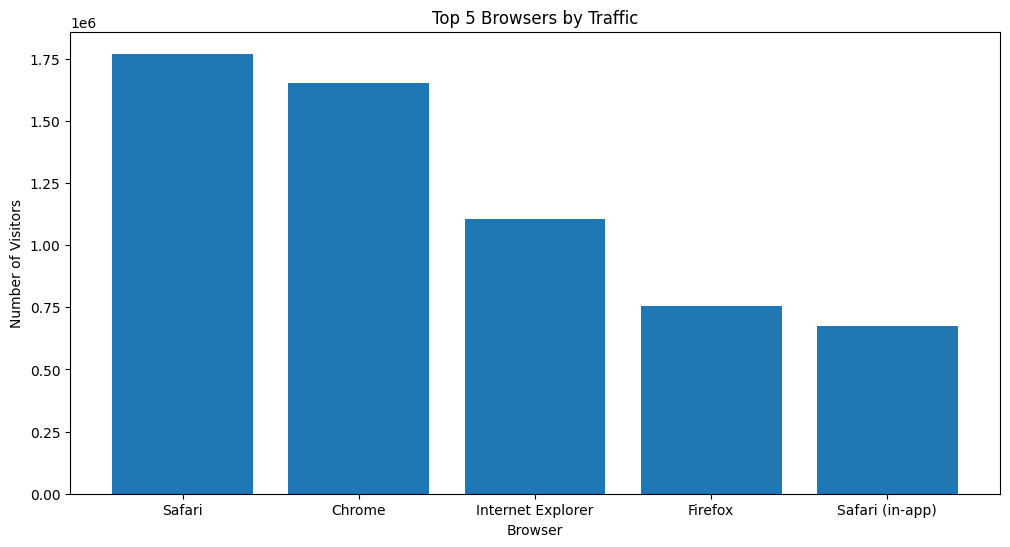

In [26]:
# Browser analysis
top_browsers = browser_data.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_browsers.index, top_browsers.values)
plt.title('Top 5 Browsers by Traffic')
plt.xlabel('Browser')
plt.ylabel('Number of Visitors')
plt.show()

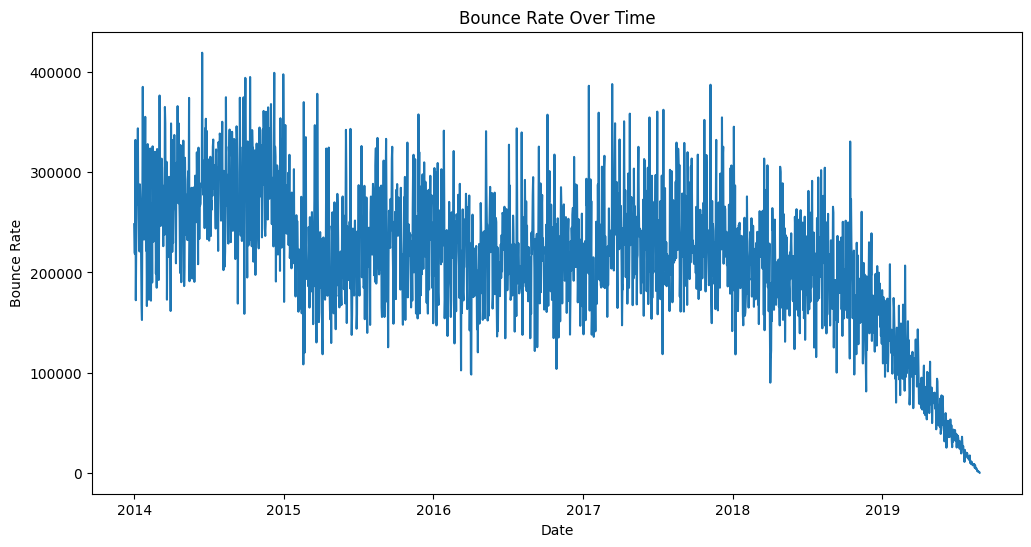

In [28]:
#Bounce Rate Analysis
#Bounce rate is an important metric that shows the percentage of visitors who leave the website after viewing only one page
# Bounce rate over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Bounce Rate'])
plt.title('Bounce Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Bounce Rate')
plt.show()
